In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [5]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [7]:
df_temp=df['Heart Disease']
le.fit(df_temp)
df['result']=le.transform(df_temp)

In [8]:
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,result
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
 14  result                   2

In [10]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
result                     0
dtype: int64

In [11]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,result
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [12]:
df['result'].value_counts()

0    150
1    120
Name: result, dtype: int64

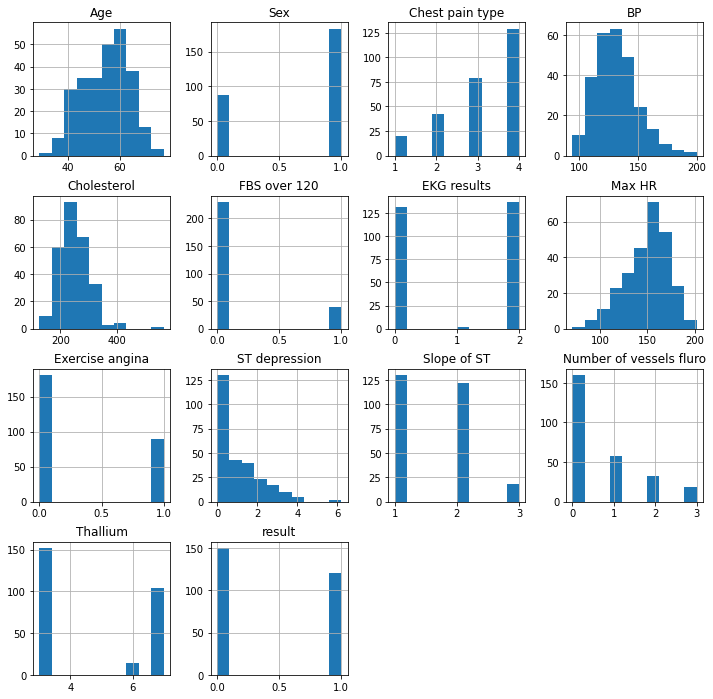

In [13]:
df.hist(figsize=(12,12))
plt.show()

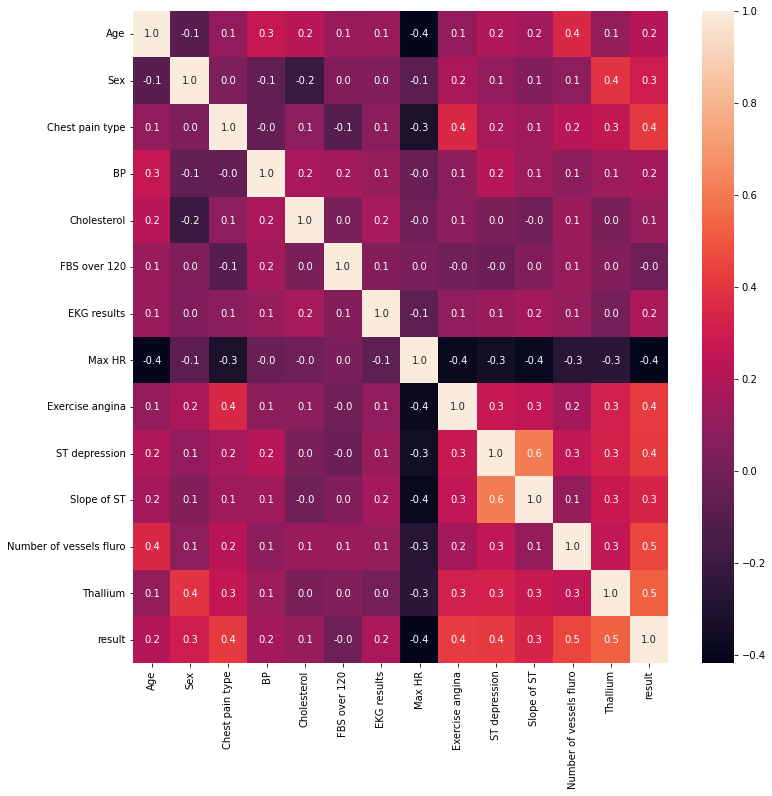

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [15]:
df=df.drop(columns='Heart Disease', axis=1)
colm=df.columns
colm


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'result'],
      dtype='object')

Age


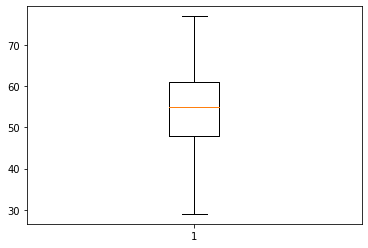

Sex


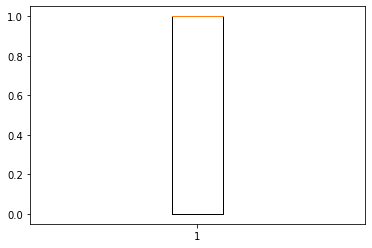

Chest pain type


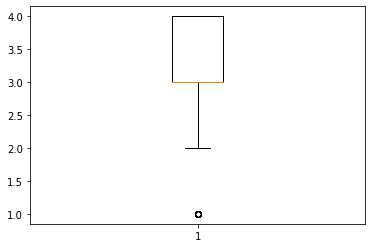

BP


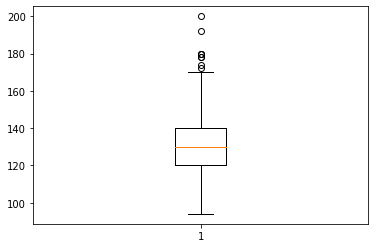

Cholesterol


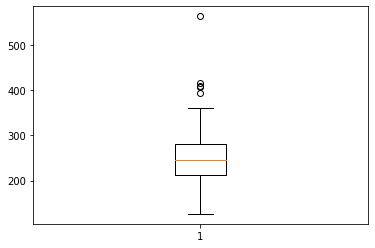

FBS over 120


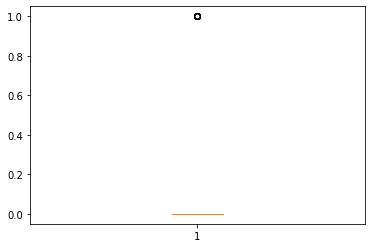

EKG results


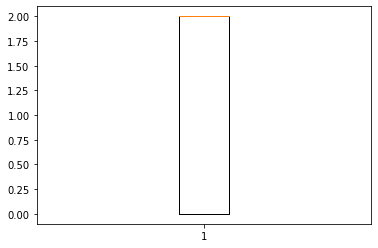

Max HR


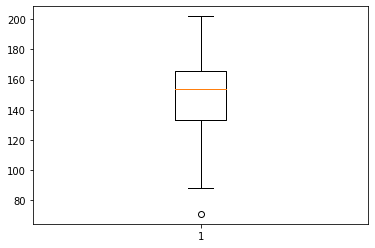

Exercise angina


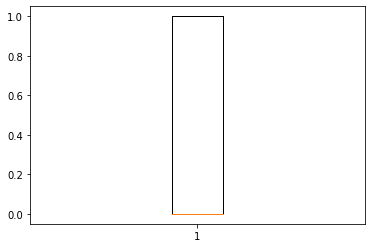

ST depression


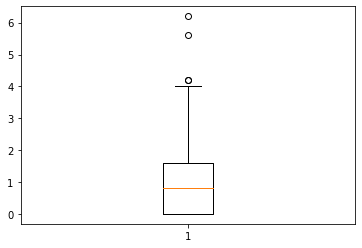

Slope of ST


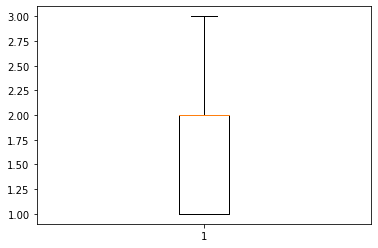

Number of vessels fluro


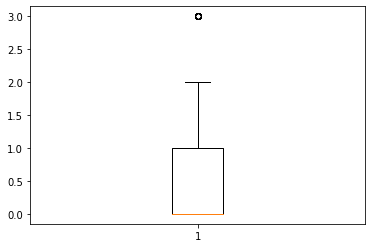

Thallium


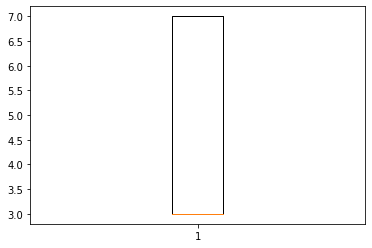

result


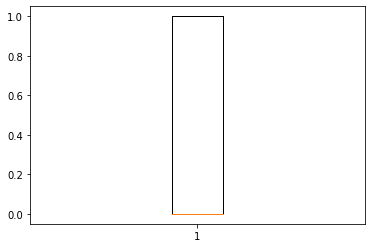

In [16]:
for col in colm:
  print(col)
  plt.boxplot(df[col])
  plt.show()

In [17]:
x=df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]

y=df['result']

In [18]:
x.shape,y.shape

((270, 13), (270,))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((189, 13), (81, 13), (189,), (81,))

random forest classfier


In [21]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
accu_rf=[]
y_pred_rf=None
final_rf=None
max_accu=0
for i in range(20,60):
  rf=RandomForestClassifier(n_estimators = i,random_state=35) 
  rf.fit(x_train,y_train)
  temp_rf=rf.predict(x_test)
  accuracy=(accuracy_score(y_test,temp_rf))
  accu_rf.append(accuracy)
  if(accuracy>=max_accu):
    # print(accuracy,max_accu)
    max_accu=accuracy
    y_pred_rf=temp_rf
    final_rf=rf
    


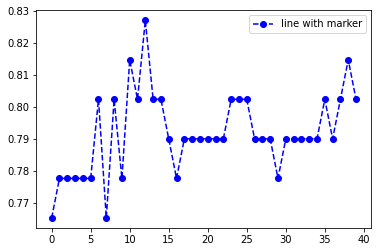

In [27]:
plt.plot(accu_rf, linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [28]:
y_pred_rf=final_rf.predict(x_test)
accuracy=(accuracy_score(y_test,y_pred_rf))

In [29]:
accuracy

0.8271604938271605

svm classifier

In [30]:
from sklearn import svm
SVM=svm.SVC(decision_function_shape='ovo')
SVM.fit(x_train,y_train)
y_pred_svm=SVM.predict(x_test)
score_svm=accuracy_score(y_test,y_pred_svm)

In [31]:
print('accurary for SVM           : ',round(score_svm*100,4))

accurary for SVM           :  74.0741


### Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
score_gnb=accuracy_score(y_test,y_pred_gnb)


In [33]:
print('accurary for naive bayes   : ',round(score_gnb*100,4))

accurary for naive bayes   :  80.2469


### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(max_iter=10000,solver='newton-cg')
reg.fit(x_train, y_train)
y_pred_reg=reg.predict(x_test)
score_reg=accuracy_score(y_test,y_pred_reg)

In [35]:

print('accuracy for logistic regression :',round(score_reg*100,4))


accuracy for logistic regression : 81.4815


In [36]:
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC , LinearSVC
from sklearn.model_selection import GridSearchCV as grid

radial basis kernal (rfb)

In [37]:
kernelSVC = Pipeline(steps = [('scaler' , StandardScaler()) , 
                              ('svc' , SVC())])


parameters = {'svc__kernel': ['poly' , 'rbf'] ,
              'svc__coef0' : [1] ,
              'svc__C' : [0.005 , 0.05 , 0.5 , 1 , 1.5 ] ,
              'svc__degree' : [2 , 5 , 13 ], 
              'svc__gamma' : [0.5 , 1 , 5 , 10 ]
             }


In [38]:
SupportVM_Classifier_grid = grid(kernelSVC , parameters)
SupportVM_Classifier_grid.fit(x_train , y_train)
yPred_kernel1 = SupportVM_Classifier_grid.predict(x_test)

In [39]:
print(accuracy_score(y_test,yPred_kernel1))

0.8271604938271605


### svc with polynomial kernal

In [40]:
temp=[]
final_svc=None
kernal_svc_pred=None
max_accu=0
for i in range(1,20):
  kernal_svc_test=Pipeline(steps = [('scaler' , StandardScaler()) , ('svc' , SVC(degree=i,kernel='poly'))])
  kernal_svc_test.fit(x_train , y_train)
  ypred_kernel_svc = kernal_svc_test.predict(x_test)
  temp_accu=(accuracy_score(y_test,ypred_kernel_svc))
  temp.append(temp_accu)
  if(temp_accu>max_accu):
    print(temp_accu,max_accu)
    max_accu=temp_accu
    final_svc=kernal_svc_test
    kernal_svc_pred=ypred_kernel_svc


0.8395061728395061 0


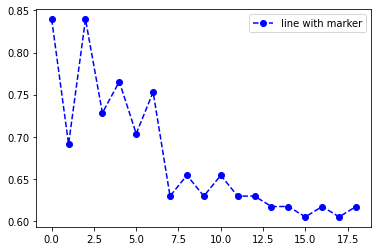

In [42]:
plt.plot(temp, linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [43]:
svc_pred=final_svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))

0.8395061728395061



### linear svc classifier

In [44]:
linear_svc = Pipeline(steps = [('scaler' , StandardScaler()) , 
                               ('linear_svc' , LinearSVC(C = 1 , loss = 'hinge',max_iter=10000,fit_intercept=False))])


linear_svc.fit(x_train , y_train)
yPred_LinearSVC = linear_svc.predict(x_test)

In [45]:
print(accuracy_score(y_test,yPred_LinearSVC))

0.7901234567901234


ada boost classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


In [47]:
accu=[]
for i in range(1,25):
  clf = AdaBoostClassifier(n_estimators=i, algorithm='SAMME', random_state=102)
  clf.fit(x_train,y_train) 
  ada_pred=clf.predict(x_test)
  temp_accu=(accuracy_score(y_test,ada_pred))
  accu.append(temp_accu)


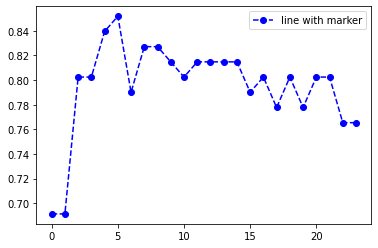

In [48]:
plt.plot(accu, linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

In [49]:
ada = AdaBoostClassifier(n_estimators=accu.index(np.max(accu))+1, algorithm='SAMME', random_state=102)
ada.fit(x_train,y_train) 
ada_pred=ada.predict(x_test)
print(accuracy_score(y_test,ada_pred))

0.8518518518518519


XGB boost

In [50]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier()

In [51]:
xg_pred=xgboost.predict(x_test)

In [52]:
print(accuracy_score(y_test,xg_pred))

0.7901234567901234


knn algorithm

### Random Forest Model -- final rf
### Support Vector Machine Model -- SVM
### Naive bayes -- gnb
### Logistic regression -- reg
### Polynomial kernal SVC -- final_svc
### Linear SVC Model -- linear_svc
### Ada Boost -- ada


In [53]:
input_data = (70,1,4,130,322,0,2,109,0,2.4,2,3,3)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = final_rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person dont have Heart Disease')
else:
  print('The Person has risk of Heart Disease')

[1]
The Person has risk of Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
print("accuracy of xgb Classifier model :" , accuracy_score(y_test,xg_pred))
print("accuracy of ada-boost model :" , accuracy_score(y_test,ada_pred))
print("accuracy of Linear SVC model :" , accuracy_score(y_test,yPred_LinearSVC))
print("accuracy of polynomial svc model :" , accuracy_score(y_test,svc_pred))
print("accuracy of logistic regression model :" , accuracy_score(y_test,y_pred_reg))
print("accuracy of random forest model :" , accuracy_score(y_test,y_pred_rf))

accuracy of xgb Classifier model : 0.7901234567901234
accuracy of ada-boost model : 0.8518518518518519
accuracy of Linear SVC model : 0.7901234567901234
accuracy of polynomial svc model : 0.8395061728395061
accuracy of logistic regression model : 0.8148148148148148
accuracy of random forest model : 0.8271604938271605


saving all our models


In [75]:
import pickle

In [76]:
filename1='rf_model.sav'
pickle.dump(rf,open(filename1,'wb'))

In [77]:
filename2='lr_model.sav'
pickle.dump(reg,open(filename2,'wb'))

In [78]:
filename3='poly_svc_model.sav'
pickle.dump(reg,open(filename3,'wb'))

In [79]:
filename4='linear_svc_model.sav'
pickle.dump(linear_svc,open(filename4,'wb'))

In [80]:
filename5='ada_model.sav'
pickle.dump(ada,open(filename5,'wb'))

In [81]:
filename6='xgb_model.sav'
pickle.dump(xgboost,open(filename6,'wb'))